In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv("C:\\Users\\chudi\\Downloads\\archive\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
legit=df[df.Class == 0]
fraud=df[df.Class == 1]

In [9]:
legit_demo=legit.sample(n=600)

In [10]:
new_df=pd.concat([legit_demo,fraud],axis=0)

In [11]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
245685,152859.0,2.034143,-0.150875,-1.221824,0.204217,0.108987,-0.582767,0.039563,-0.118657,0.356429,...,-0.260309,-0.664148,0.287130,-0.474839,-0.302076,0.209192,-0.074432,-0.075034,3.99,0
281688,170361.0,2.049256,-0.234483,-0.671948,0.199981,-0.069783,-0.042065,-0.400260,-0.070228,1.157847,...,-0.228346,-0.429863,0.234373,-1.073150,-0.260849,-0.558403,0.045236,-0.039046,7.50,0
141005,84075.0,-0.670935,1.118534,0.574413,0.961391,-0.129964,-0.416648,0.225369,0.352751,-0.450039,...,0.198934,0.495690,0.104543,0.065305,-0.221615,-0.313784,-0.258792,-0.056131,14.17,0
35653,38210.0,0.640318,-1.975130,0.668315,-0.319674,-1.536106,0.769547,-0.872723,0.278092,-0.131361,...,0.258660,0.166867,-0.307266,-0.257120,0.200726,-0.246622,0.003193,0.065705,340.25,0
137071,82002.0,-0.451640,0.567418,2.076621,0.116573,0.012995,-0.245928,0.735908,-0.357163,0.293423,...,-0.021945,0.325078,-0.298440,0.571115,-0.039343,0.286731,-0.573413,-0.401075,1.00,0


In [12]:
X=new_df.drop(['Class'],axis=1)
Y=new_df['Class']
print(X.shape)
print(Y.shape)

(1092, 30)
(1092,)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3)

In [15]:
kval=np.arange(1,50)
train_score_list=[]
test_score_list=[]

In [16]:
for k in kval:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred_train=knn.predict(X_train)
    y_pred_test=knn.predict(X_test)
    train_score_list.append(accuracy_score(Y_train,y_pred_train))
    test_score_list.append(accuracy_score(Y_test,y_pred_test))

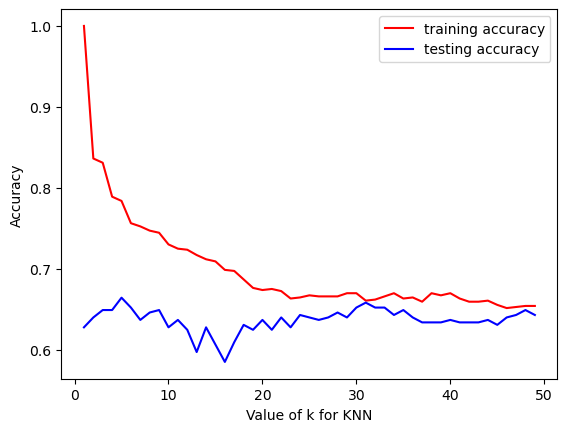

In [17]:
plt.plot(kval,train_score_list,color='red',label='training accuracy')
plt.plot(kval,test_score_list,color='blue',label='testing accuracy')
plt.xlabel("Value of k for KNN")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
knn=KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train,Y_train)
y_pred_test=knn.predict(X_test)
y_pred_train=knn.predict(X_train)
print(accuracy_score(Y_train,y_pred_train))
print(accuracy_score(Y_test,y_pred_test))

0.6662303664921466
0.6402439024390244


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
cm=confusion_matrix(y_pred_test,Y_test)
cm

array([[138,  80],
       [ 38,  72]], dtype=int64)

Text(33.22222222222222, 0.5, 'truth')

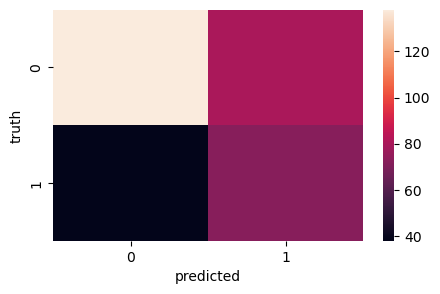

In [21]:
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cm)
plt.xlabel('predicted')
plt.ylabel('truth')

In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       176
           1       0.65      0.47      0.55       152

    accuracy                           0.64       328
   macro avg       0.64      0.63      0.63       328
weighted avg       0.64      0.64      0.63       328

